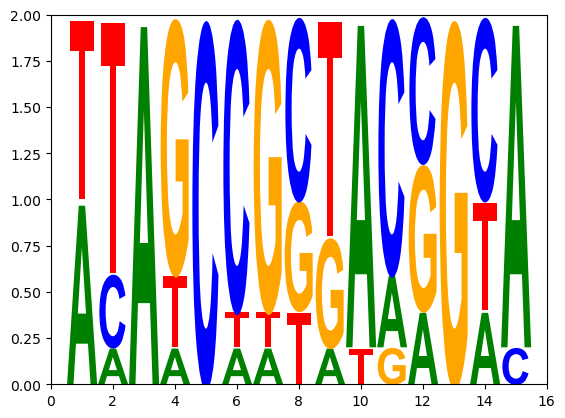

In [2]:
using DataFrames
using SequenceLogos
using SequenceLogos: SequenceLogo, SequenceLogoSite, WeightedLetter, plot_sequence_logo_nt

li = [
    "atagccggtacggca",
    "ttagctgcaaccgca",
    "tcagccactagagca",
    "ataaccgcgaccgca",
    "ttagccgctaaggta",
    "taagcctcgtacgta",
    "ttagccgttacggcc",
    "atatccggtacagta",
    "atagcaggtaccgaa",
    "acatccgtgacggaa",
]

new_li = String[]
for i in 1:length(li[1])
    r = ""
    for j in 1:length(li)
        r *= li[j][i]
    end
    push!(new_li, r)
end


position_weight_matrix = zeros(Float64, (4, 15))
alphabets = ['a', 'c', 'g', 't']
for seq in 1:length(new_li)
    for alphabet in 1:length(alphabets)
        position_weight_matrix[alphabet, seq] = count(i->(i == alphabets[alphabet]), new_li[seq]) / 5
    end
end


df = DataFrame(A=position_weight_matrix[1,:], C=position_weight_matrix[2,:],
G=position_weight_matrix[3,:], T=position_weight_matrix[4,:])


logo = SequenceLogo([SequenceLogoSite([WeightedLetter(j[1], df[i, j]) for j in ["A", "C", "G", "T"]]) for i=1:15])
plot_sequence_logo_nt(logo)